In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("heart_failure.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Exploration

In [246]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


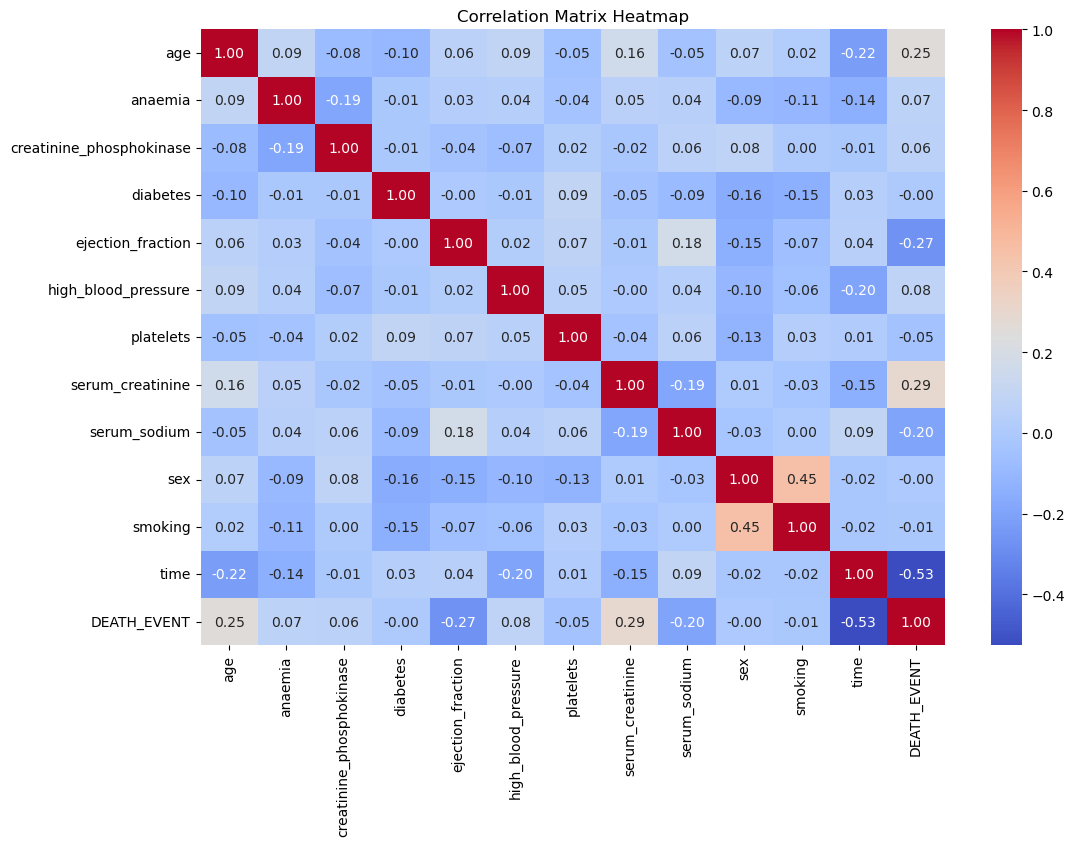

In [247]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

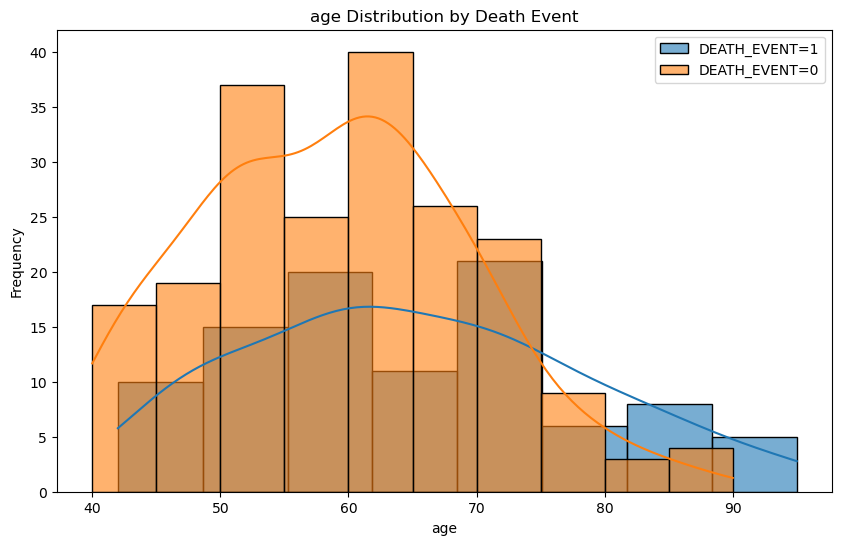

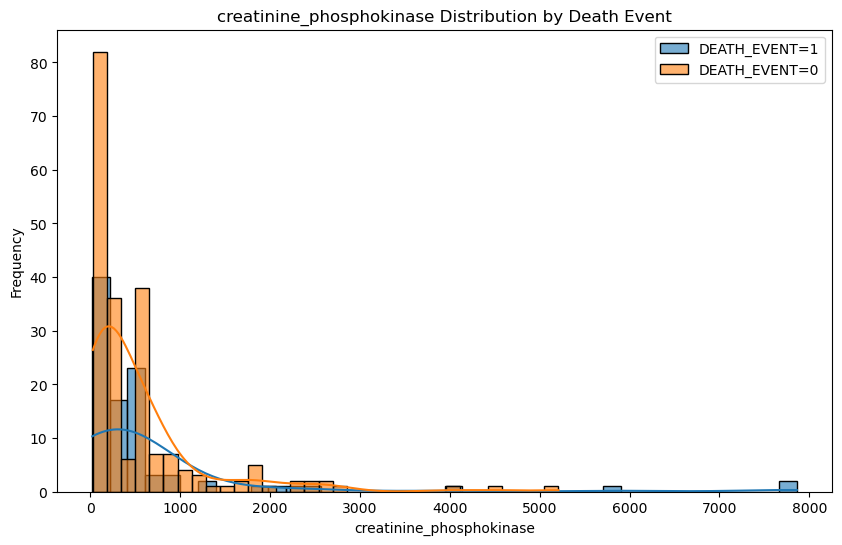

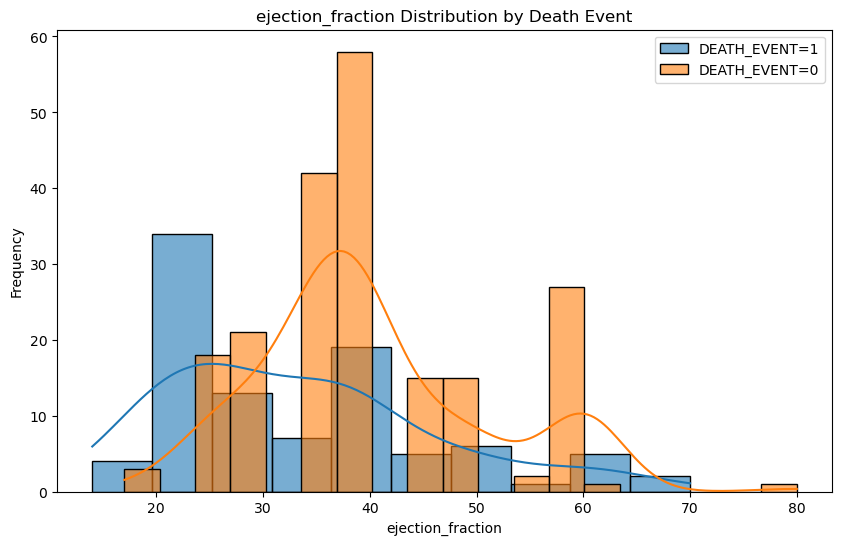

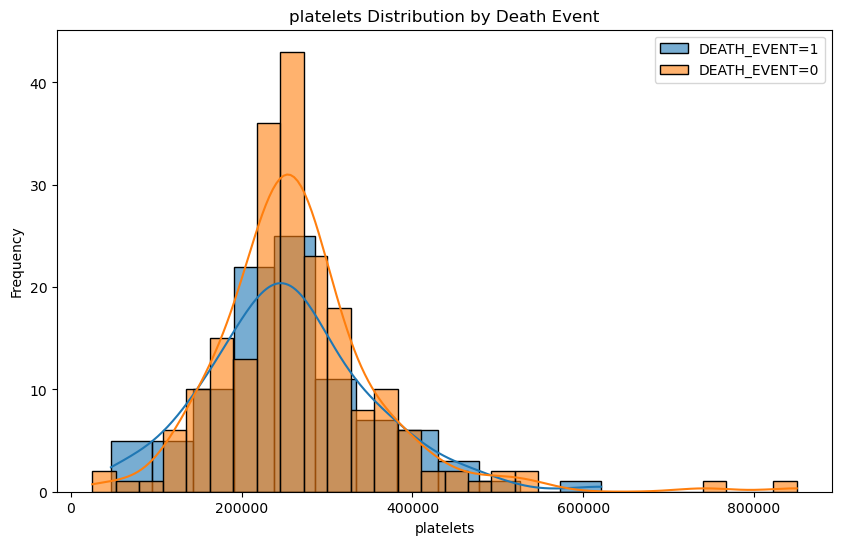

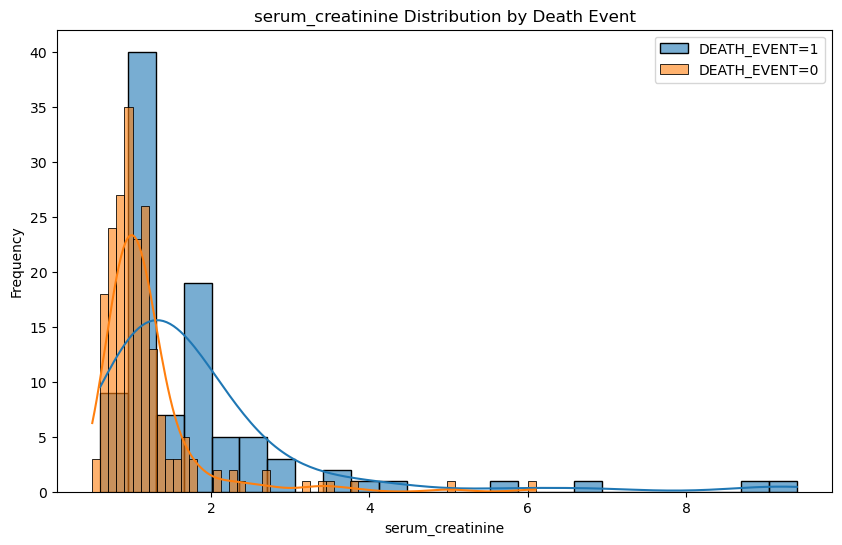

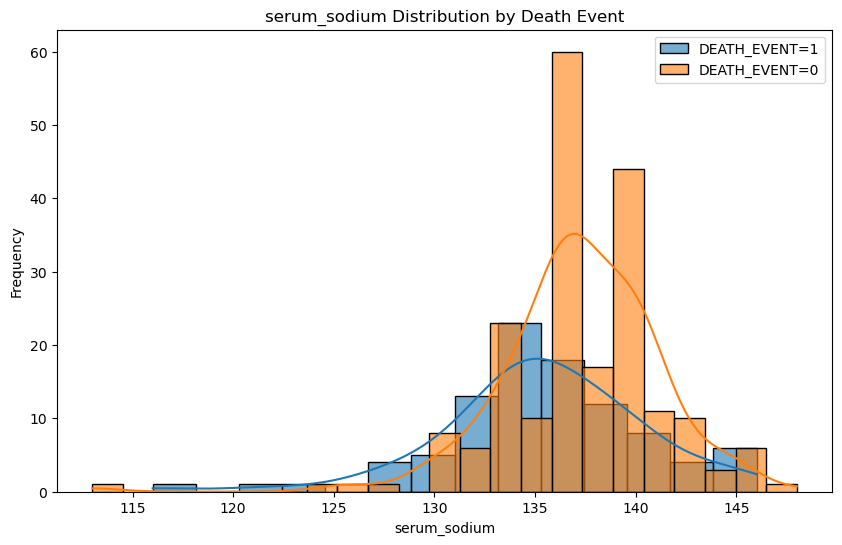

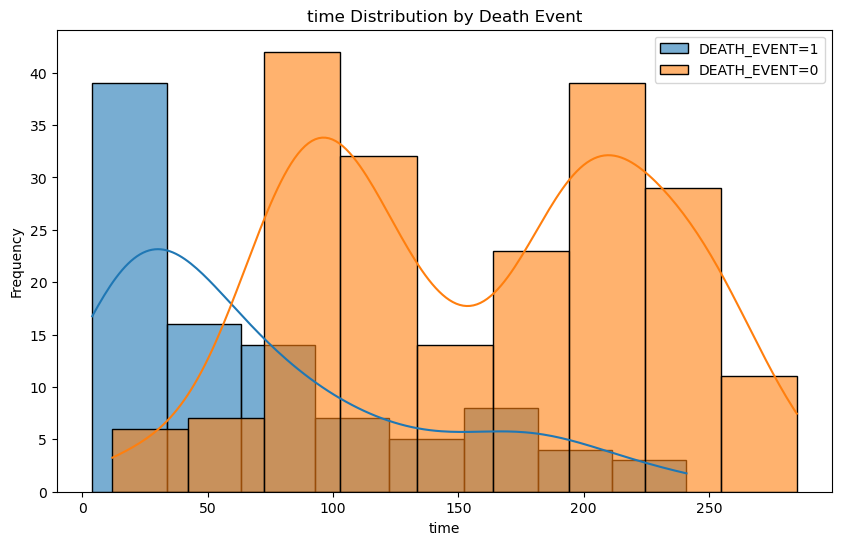

In [250]:
# Numerical features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Group by 'DEATH_EVENT' and create histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    
    # Create separate histograms for each 'DEATH_EVENT' category
    for death_event in df['DEATH_EVENT'].unique():
        sns.histplot(df[df['DEATH_EVENT'] == death_event][feature], kde=True, label=f'DEATH_EVENT={death_event}', alpha=0.6)
    
    plt.title(f'{feature} Distribution by Death Event')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


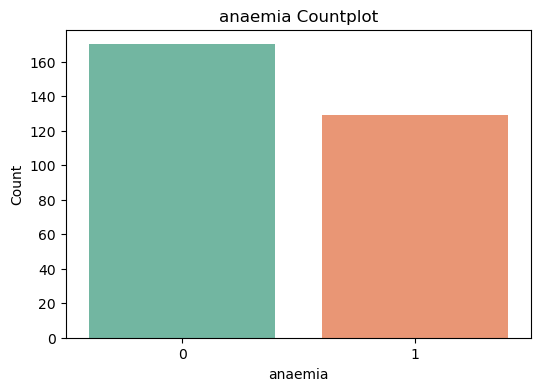

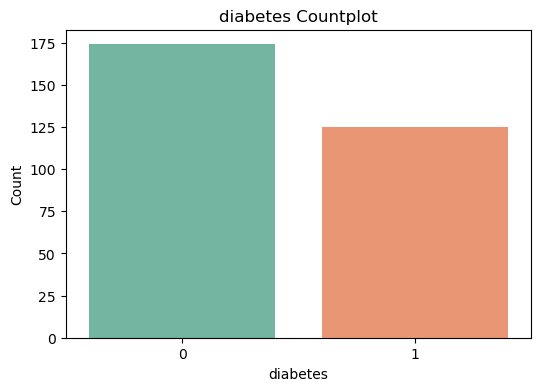

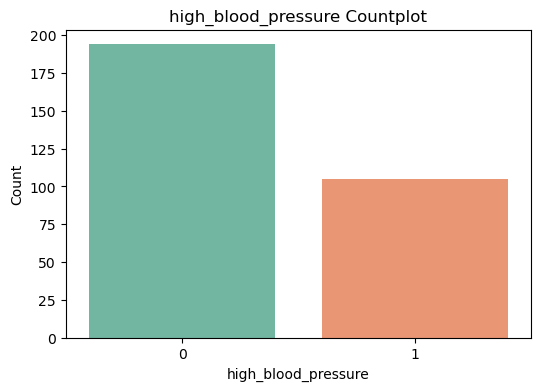

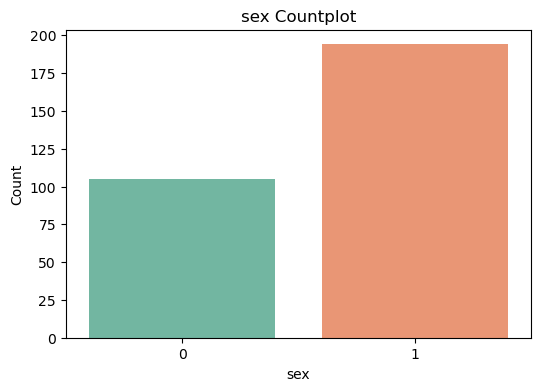

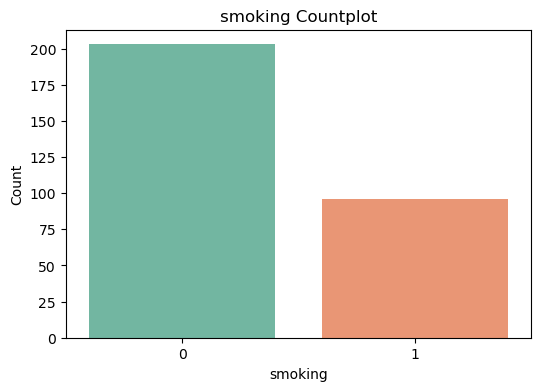

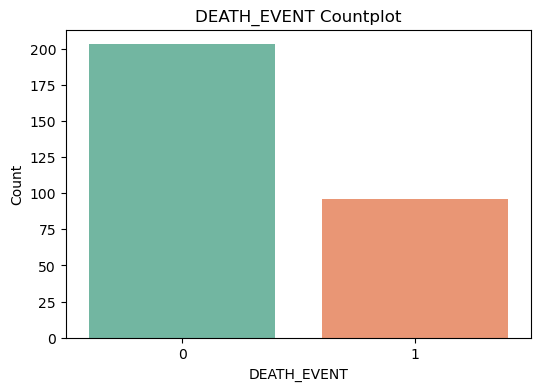

In [251]:
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'{feature} Countplot')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

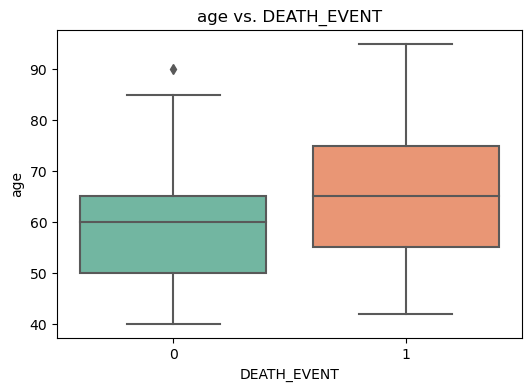

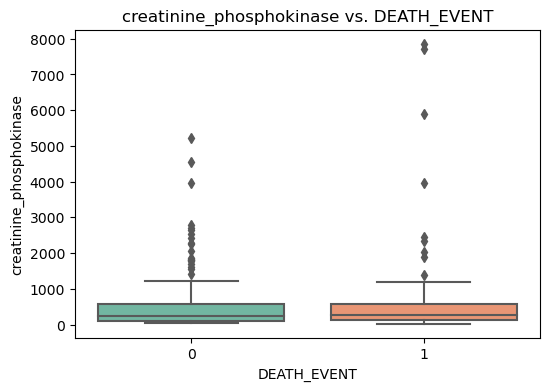

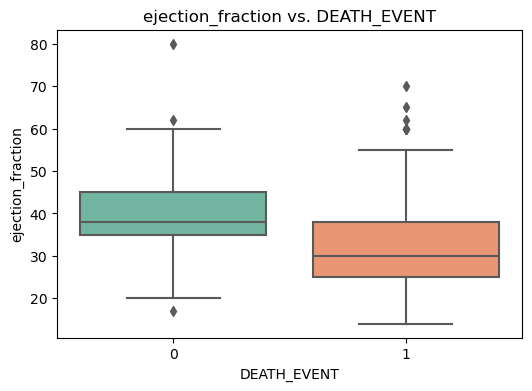

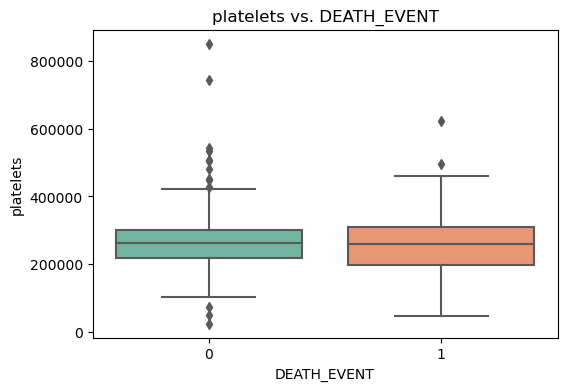

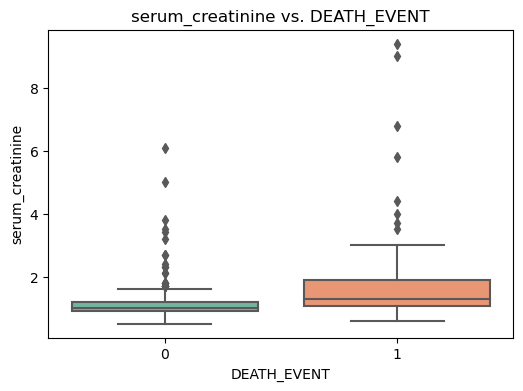

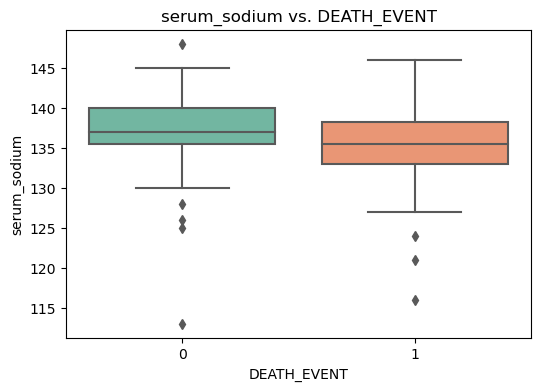

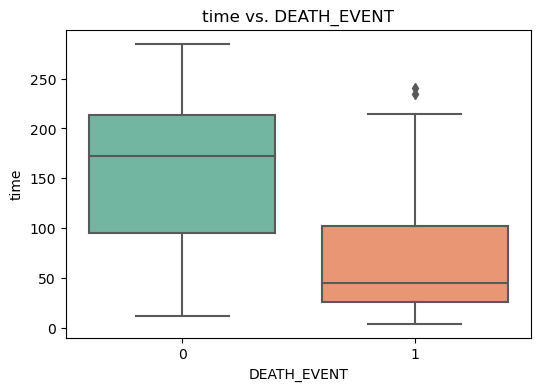

In [252]:
# Boxplots for numerical features vs. target variable (DEATH_EVENT)
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='DEATH_EVENT', y=feature, palette='Set2')
    plt.title(f'{feature} vs. DEATH_EVENT')
    plt.xlabel('DEATH_EVENT')
    plt.ylabel(feature)
    plt.show()

# Polynomial Regression

In [331]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [253]:
# Splitting Data into feature variables and target variables
df_X = df.drop(['DEATH_EVENT'], axis=1)  # Features
df_Y = df["DEATH_EVENT"]  # Target variable

# Creating Feature array and Label array
X = df.drop(['DEATH_EVENT'], axis=1).values  # Features
Y = df["DEATH_EVENT"].values.reshape(-1, 1)  # Target variable, reshaped to a 2D array

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define the hyperparameter grid for polynomial degree
grid_param = {'poly__degree': np.arange(1, 10)}

# Create a Pipeline for polynomial regression
PIPELINE = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('regression', LinearRegression())
])

# Perform GridSearchCV with cross-validation
gridsearch = GridSearchCV(PIPELINE, grid_param, cv=10, scoring="neg_mean_squared_error", verbose=0)

# Fit the grid search to the training data
gridsearch.fit(X_train, y_train)

# Make predictions on the test data
pred = gridsearch.predict(X_test)

# Convert predictions to binary labels (0 or 1) based on a threshold of 0.5
pred = pred > 0.5
pred = pred.astype(int)

# Calculate evaluation metrics
poly_conf = confusion_matrix(y_test, pred)
poly_acc = metrics.accuracy_score(y_test, pred)
poly_recall = metrics.recall_score(y_test, pred)
poly_f1 = metrics.f1_score(y_test, pred)

# Print confusion matrix and evaluation metrics
print('Confusion Matrix \n {}'.format(poly_conf))
print('Accuracy : {:.2f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(poly_acc, poly_recall, poly_f1))


Confusion Matrix 
 [[50  3]
 [17 20]]
Accuracy : 0.78
Recall : 0.54
f1 score : 0.67


## Lasso Regression

In [254]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Define a hyperparameter grid for Lasso alpha
grid_param = {'laso__alpha': np.arange(0.01, 1, 0.01)}

# Create a Pipeline for Lasso regression
PIPELINE = Pipeline([('laso', Lasso())])

# Perform GridSearchCV with cross-validation to find the optimal Lasso alpha
gridsearch = GridSearchCV(PIPELINE, grid_param, cv=10, scoring="neg_mean_squared_error", verbose=0,n_jobs=-1)

# Fit the grid search to the training data
gridsearch.fit(X_train, y_train)

# Make predictions on the test data using the best Lasso model from grid search
pred = gridsearch.predict(X_test)

# Convert predictions to binary labels (0 or 1) based on a threshold of 0.5
pred = pred > 0.5
pred = pred.astype(int)

# Calculate the confusion matrix and evaluation metrics for Lasso regression
laso_conf = confusion_matrix(y_test, pred)
laso_acc = metrics.accuracy_score(y_test, pred)
laso_recall = metrics.recall_score(y_test, pred)
laso_f1 = metrics.f1_score(y_test, pred)

# Print the confusion matrix and evaluation metrics for Lasso regression
print('Confusion Matrix \n {} \n'.format(laso_conf))
print('Accuracy : {:.2f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(laso_acc, laso_recall, laso_f1))


Confusion Matrix 
 [[50  3]
 [16 21]] 

Accuracy : 0.79
Recall : 0.57
f1 score : 0.69


## Ridge Regression

In [255]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define a hyperparameter grid for Ridge alpha
grid_param = {'ridge__alpha': np.arange(0.01, 1, 0.01)}

# Create a Pipeline for Ridge regression
PIPELINE = Pipeline([('ridge', Ridge())])

# Perform GridSearchCV with cross-validation to find the optimal Ridge alpha
gridsearch = GridSearchCV(PIPELINE, grid_param, cv=10, scoring="neg_mean_squared_error", verbose=0)

# Fit the grid search to the training data
gridsearch.fit(X_train, y_train)

# Make predictions on the test data using the best Ridge model from grid search
pred = gridsearch.predict(X_test)

# Convert predictions to binary labels (0 or 1) based on a threshold of 0.5
pred = pred > 0.5
pred = pred.astype(int)

# Calculate the confusion matrix and evaluation metrics for Ridge regression
ridge_conf = confusion_matrix(y_test, pred)
ridge_acc = metrics.accuracy_score(y_test, pred)
ridge_recall = metrics.recall_score(y_test, pred)
ridge_f1 = metrics.f1_score(y_test, pred)

# Print the confusion matrix and evaluation metrics for Ridge regression
print('Confusion Matrix \n {} \n'.format(ridge_conf))
print('Accuracy : {:.2f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(ridge_acc, ridge_recall, ridge_f1))


Confusion Matrix 
 [[50  3]
 [17 20]] 

Accuracy : 0.78
Recall : 0.54
f1 score : 0.67


## Feature Selection

In [202]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, y_train_1d)
selected_features= SelectFromModel(lasso_model, prefit=True).transform(X_train)
selected_test_features = SelectFromModel(lasso_model, prefit=True).transform(X_test)


In [237]:
important_feature_names = df_X.columns[lasso_model.coef_ != 0].tolist()
print(important_feature_names)

['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'time']


### K Nearest Neighbour


In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [256]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Standardize the selected features for both training and test data
scaler = StandardScaler()
selected_features_norm = scaler.fit_transform(selected_features)
selected_test_features_norm = scaler.transform(selected_test_features)

# Define a hyperparameter grid for the number of neighbors in KNeighborsClassifier
param_grid = {'knn__n_neighbors': np.arange(1, 20)}

# Create a Pipeline for KNeighborsClassifier
est = Pipeline([('knn', KNeighborsClassifier())])

# Perform GridSearchCV with cross-validation to find the optimal number of neighbors
gridsearch = GridSearchCV(estimator=est, param_grid=param_grid, cv=10, scoring="recall_micro")

# Fit the grid search to the standardized training data
model = gridsearch.fit(selected_features_norm, y_train_1d)

# Print the best hyperparameters and corresponding cross-validation score
print(model.best_params_, model.best_score_, '\n')

# Make predictions on the standardized test data using the best model
pred = model.predict(selected_test_features_norm)

# Calculate the confusion matrix and evaluation metrics for KNeighborsClassifier
knn_conf = confusion_matrix(y_test, pred)
knn_acc = metrics.accuracy_score(y_test, pred)
knn_recall = metrics.recall_score(y_test, pred)
knn_f1 = metrics.f1_score(y_test, pred)

# Print the confusion matrix and evaluation metrics for KNeighborsClassifier
print('Confusion Matrix \n {} \n'.format(knn_conf))
print('Accuracy : {:.2f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(knn_acc, knn_recall, knn_f1))


{'knn__n_neighbors': 3} 0.8421428571428571 

Confusion Matrix 
 [[48  5]
 [16 21]] 

Accuracy : 0.77
Recall : 0.57
f1 score : 0.67


## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import sklearn.tree as tree

In [257]:
# Splitting the data into training and testing sets using a 70-30 split and a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define hyperparameter grid for DecisionTreeClassifier
param = {'tree__max_depth': np.arange(1, 20),
         'tree__criterion': ["entropy", "gini"]}

# Create a Pipeline for DecisionTreeClassifier
pipe = Pipeline([('tree', DecisionTreeClassifier())])

# Perform GridSearchCV with cross-validation to find the optimal hyperparameters
gridsearch = GridSearchCV(estimator=pipe, param_grid=param, cv=10, scoring="accuracy",n_jobs=-1)

# Fit the grid search to the selected features and training labels
gridsearch.fit(selected_features, y_train)

# Print the best cross-validation score and corresponding hyperparameters
print(gridsearch.best_score_, gridsearch.best_params_, '\n')

# Get the best estimator from grid search
model = gridsearch.best_estimator_

# Make predictions on the selected test features
pred = model.predict(selected_test_features)

# Calculate the confusion matrix for DecisionTreeClassifier
dec_conf = confusion_matrix(y_test, pred)
dec_acc = metrics.accuracy_score(y_test, pred)
dec_recall = metrics.recall_score(y_test, pred)
dec_f1 = metrics.f1_score(y_test, pred)

# Print the confusion matrix and evaluation metrics for DecisionTreeClassifier
print('Confusion Matrix \n {} \n'.format(dec_conf))
print('Accuracy : {:.2f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(dec_acc, dec_recall, dec_f1))


0.865952380952381 {'tree__criterion': 'entropy', 'tree__max_depth': 1} 

Confusion Matrix 
 [[50  3]
 [18 19]] 

Accuracy : 0.77
Recall : 0.51
f1 score : 0.64


## Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [258]:
# Define hyperparameter grid for LogisticRegression
param_grid = {'lr__C': np.arange(0.01, 4, 0.5),
              'lr__solver': ['liblinear']}

# Create a Pipeline for LogisticRegression
est = Pipeline([('lr', LogisticRegression())])

# Perform GridSearchCV with cross-validation to find the optimal hyperparameters
gridsearch = GridSearchCV(estimator=est, param_grid=param_grid, cv=10, scoring="accuracy",n_jobs=-1)

# Fit the grid search to the selected features and training labels
gridsearch.fit(selected_features, y_train_1d)

# Make predictions on the selected test features
pred = gridsearch.predict(selected_test_features)

# Calculate the confusion matrix for LogisticRegression
lr_conf = confusion_matrix(y_test, pred)
lr_acc = metrics.accuracy_score(y_test, pred)
lr_recall = metrics.recall_score(y_test, pred)
lr_f1 = metrics.f1_score(y_test, pred)

# Print the best hyperparameters from grid search
print(gridsearch.best_params_, '\n')

# Print the confusion matrix and evaluation metrics for LogisticRegression
print('Confusion Matrix \n {} \n'.format(lr_conf))
print('Accuracy : {:.2f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(lr_acc, lr_recall, lr_f1))


{'lr__C': 0.01, 'lr__solver': 'liblinear'} 

Confusion Matrix 
 [[50  3]
 [16 21]] 

Accuracy : 0.79
Recall : 0.57
f1 score : 0.69


## svm

In [261]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

# Standardize the selected features for both training and test data
selected_features_norm = stdscaler.fit_transform(selected_features)
selected_test_features_norm = stdscaler.transform(selected_test_features)

# Define a hyperparameter grid for the SVM classifier
param_grid = {'svm__degree': np.arange(1, 10, 1),
              'svm__C': np.arange(0.01, 10, 0.5),
              'svm__gamma': np.linspace(0.01, 5, 10)}

# Create a Pipeline for Polynomial SVM classifier
pipe = Pipeline([('polyfeature', PolynomialFeatures()),  # Add polynomial features
                 ('svm', SVC(kernel='rbf'))])  # Use the radial basis function kernel

# Perform GridSearchCV with cross-validation to find the optimal hyperparameters
gridsearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=10, scoring='f1', verbose=0,n_jobs=-1)

# Fit the grid search to the standardized training features and labels
gridsearch.fit(selected_features_norm, y_train)

# Print the best hyperparameters from grid search
print(gridsearch.best_params_, '\n')

svm_conf = confusion_matrix(y_test, pred)
svm_acc = metrics.accuracy_score(y_test, pred)
svm_recall = metrics.recall_score(y_test, pred)
svm_f1 = metrics.f1_score(y_test, pred)


print('Confusion Matrix \n {} \n'.format(svm_conf))
print('Accuracy : {:.2f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(svm_acc, svm_recall, svm_f1))


{'svm__C': 4.01, 'svm__degree': 1, 'svm__gamma': 0.01} 

Confusion Matrix 
 [[50  3]
 [16 21]] 

Accuracy : 0.79
Recall : 0.57
f1 score : 0.69


E:\Apps\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Random Forest


In [118]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
# Define a hyperparameter grid for the number of estimators in RandomForestClassifier
param_grid = {'rf__n_estimators': np.arange(1, 100, 2)}

# Create a RandomForestClassifier with a fixed random state for reproducibility
rf_classifier = RandomForestClassifier(random_state=42)

# Create a Pipeline for RandomForestClassifier
pipe = Pipeline([("rf", rf_classifier)])

# Perform GridSearchCV with cross-validation to find the optimal number of estimators
gridsearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=10, scoring='accuracy', verbose=0,n_jobs=-1)

# Fit the grid search to the selected features and training labels
gridsearch.fit(selected_features, y_train)

# Print the best hyperparameters from grid search
print(gridsearch.best_params_, '\n')

# Make predictions on the selected test features using the best model
pred = gridsearch.predict(selected_test_features)

# Calculate the confusion matrix and evaluation metrics for RandomForestClassifier
rf_conf = confusion_matrix(y_test, pred)
rf_acc = metrics.accuracy_score(y_test, pred)
rf_recall = metrics.recall_score(y_test, pred)
rf_f1 = metrics.f1_score(y_test, pred)

# Print the confusion matrix and evaluation metrics for RandomForestClassifier
print('Confusion Matrix \n {} \n'.format(rf_conf))
print('Accuracy : {:.2f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(rf_acc, rf_recall, rf_f1))


{'rf__n_estimators': 89} 

Confusion Matrix 
 [[48  5]
 [18 19]] 

Accuracy : 0.74
Recall : 0.51
f1 score : 0.62


E:\Apps\Anaconda\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [264]:
# Define a hyperparameter grid for the number of estimators in RandomForestClassifier
param_grid = {'rf__n_estimators': np.arange(1, 100, 2)}

# Create a RandomForestClassifier with a fixed random state for reproducibility
rf_classifier = RandomForestClassifier(random_state=42)

# Create a Pipeline for RandomForestClassifier
pipe = Pipeline([("rf", rf_classifier)])

# Perform GridSearchCV with cross-validation to find the optimal number of estimators
gridsearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=10, scoring='accuracy', verbose=0)

y_train_1d = y_train.ravel()
# Fit the grid search to the training features and labels
gridsearch.fit(X_train, y_train_1d)

# Print the best hyperparameters from grid search
print(gridsearch.best_params_, '\n')

# Make predictions on the test features using the best model
pred = gridsearch.predict(X_test)

# Calculate the confusion matrix and evaluation metrics for RandomForestClassifier
rf2_conf = confusion_matrix(y_test, pred)
rf2_acc = metrics.accuracy_score(y_test, pred)
rf2_recall = metrics.recall_score(y_test, pred)
rf2_f1 = metrics.f1_score(y_test, pred)

# Print the confusion matrix and evaluation metrics for RandomForestClassifier
print('Confusion Matrix \n {} \n'.format(rf2_conf))
print('Accuracy : {:.2f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(rf2_acc, rf2_recall, rf2_f1))


{'rf__n_estimators': 63} 

Confusion Matrix 
 [[49  4]
 [17 20]] 

Accuracy : 0.77
Recall : 0.54
f1 score : 0.66


# VotingClassifier

In [142]:
from sklearn.ensemble import VotingClassifier

In [269]:
# Create individual classifiers with specified hyperparameters
log_clf = LogisticRegression(C=0.01)
rnd_clf = RandomForestClassifier(n_estimators=89)
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
svm_clf = SVC(C=4.01, degree=1, gamma=0.01,probability=True)
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Create a VotingClassifier that combines the predictions of individual classifiers using hard voting
voting_clf = VotingClassifier(estimators=[('log', log_clf), ('rfc', rnd_clf), ('tree', tree_clf), ('svm', svm_clf), ('knn', knn_clf)], voting='hard')

# Fit the VotingClassifier to the standardized training features and labels
voting_clf.fit(selected_features_norm, y_train_1d)

# Make predictions on the standardized test features
pred = voting_clf.predict(selected_test_features_norm)

# Calculate the confusion matrix and evaluation metrics for the VotingClassifier
vot_conf = confusion_matrix(y_test, pred)
vot_acc = metrics.accuracy_score(y_test, pred)
vot_recall = metrics.recall_score(y_test, pred)
vot_f1 = metrics.f1_score(y_test, pred)

# Print the confusion matrix and evaluation metrics for the VotingClassifier
print('Confusion Matrix \n {} \n'.format(vot_conf))
print('Accuracy : {:.2f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(vot_acc, vot_recall, vot_f1))


Confusion Matrix 
 [[50  3]
 [20 17]] 

Accuracy : 0.74
Recall : 0.46
f1 score : 0.60


## Neural Network

In [149]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [334]:
# Define a Sequential neural network model
model = Sequential([
    Dense(4, activation='relu', input_shape=(selected_features_norm.shape[1], )),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

# Train the model on your training data
h = model.fit(selected_features_norm, y_train, epochs=200, batch_size=8, validation_split=0.2, verbose=0.)

# Evaluate the model on your test data
model.evaluate(selected_test_features_norm, y_test)

# Make predictions using the model and threshold them to binary values (0 or 1)
pred = model.predict(selected_test_features_norm)
pred = (pred > 0.5).astype(int)

# Calculate the confusion matrix, accuracy, recall, and F1 score
nn_conf = confusion_matrix(y_test, pred)
nn_acc = metrics.accuracy_score(y_test, pred)
nn_recall = metrics.recall_score(y_test, pred)
nn_f1 = metrics.f1_score(y_test, pred)

# Print the confusion matrix and evaluation metrics
print('Confusion Matrix \n {} \n'.format(nn_conf))
print('Accuracy : {:.2f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(nn_acc, nn_recall, nn_f1))

3/3 [==============================] - 0s 2ms/step
Confusion Matrix 
 [[50  3]
 [13 24]] 

Accuracy : 0.82
Recall : 0.65
f1 score : 0.75


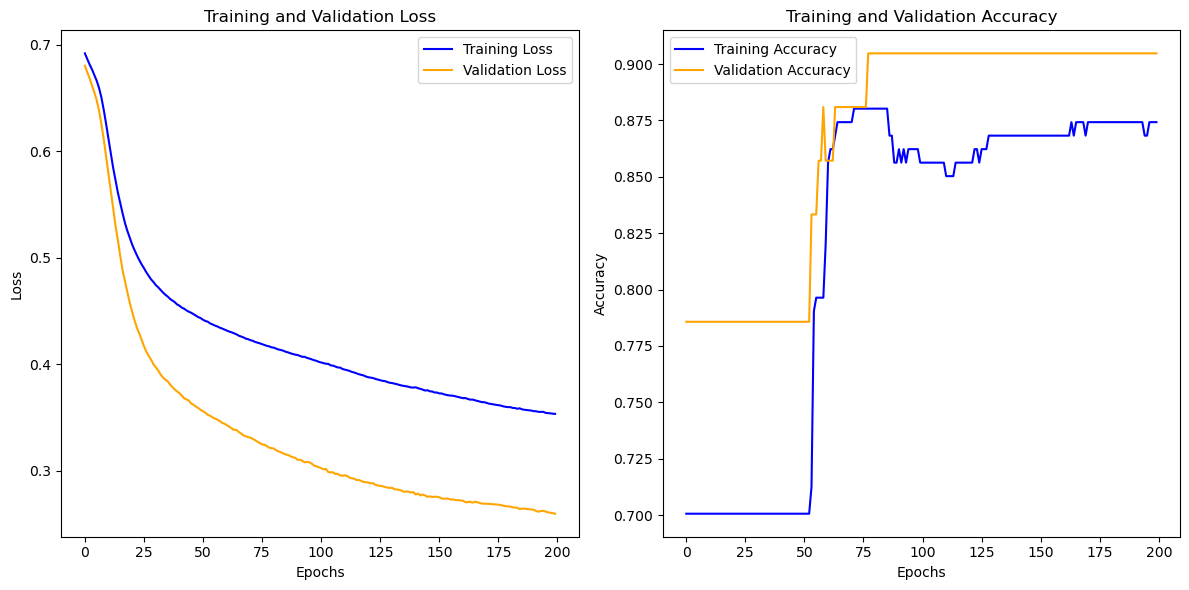

In [335]:
# Access training history
training_loss = h.history['loss']
validation_loss = h.history['val_loss']
training_accuracy = h.history['accuracy']
validation_accuracy = h.history['val_accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 6))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy', color='blue')
plt.plot(validation_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


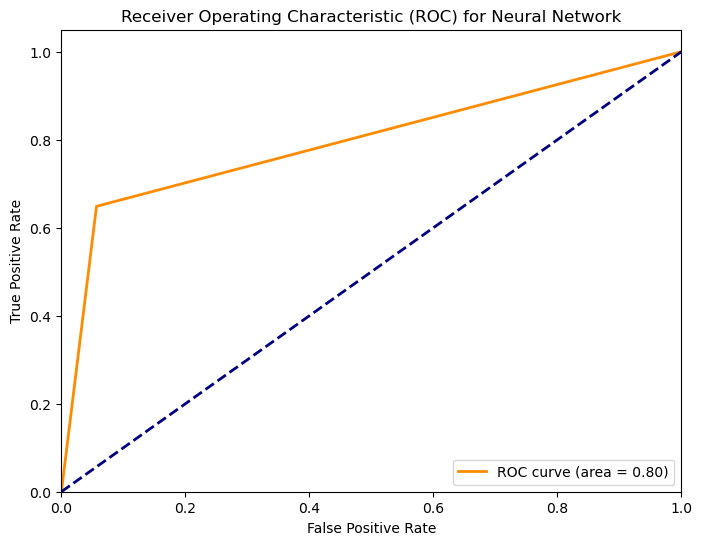

In [339]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Neural Network')
plt.legend(loc='lower right')
plt.show()

# AdaBoost

In [329]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# Load a dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Create a LogisticRegression estimator
base_estimator = LogisticRegression(C=0.01)

# Create an AdaBoostClassifier with the logistic regression estimator
ada_classifier = AdaBoostClassifier(estimator=base_estimator,algorithm="SAMME.R")

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': np.arange(1,50,1),  # Number of boosting rounds
    'learning_rate': np.arange(0.01,0.1,0.01)  # Learning rate for each round
}

# Create a GridSearchCV instance with cross-validation (e.g., 5-fold)
grid_search = GridSearchCV(ada_classifier, param_grid, cv=20,scoring='accuracy',verbose=2,n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(selected_features,y_train)

pred=ada_clf.predict(selected_test_features)

print(grid_search.best_estimator_,'\n')

ada_conf = confusion_matrix(y_test, pred)
ada_acc = metrics.accuracy_score(y_test, pred)
ada_recall = metrics.recall_score(y_test, pred)
ada_f1 = metrics.f1_score(y_test, pred)

print('Confusion Matrix \n {} \n'.format(ada_conf))
print('Accuracy : {:.3f}\nRecall : {:.2f}\nf1 score : {:.2f}'.format(ada_acc, ada_recall, ada_f1))


Fitting 20 folds for each of 441 candidates, totalling 8820 fits
AdaBoostClassifier(estimator=LogisticRegression(C=0.01), learning_rate=0.01,
                   n_estimators=1) 

Confusion Matrix 
 [[49  4]
 [15 22]] 

Accuracy : 0.789
Recall : 0.59
f1 score : 0.70


E:\Apps\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Gradient Boosting

In [197]:
#For Most Important Features

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import numpy as np

# Load a dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': np.arange(1, 200, 1),       # Number of boosting rounds
    'learning_rate': np.arange(0.01, 0.1, 0.01)  # Learning rate for each round
}

# Create a GridSearchCV instance with cross-validation (e.g., 5-fold)
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(selected_features, y_train)

# Get the best estimator (GradientBoostingClassifier with the best hyperparameters)
best_gbc = grid_search.best_estimator_

# Make predictions on the test data
pred = best_gbc.predict(selected_test_features)

print(grid_search.best_estimator_,'\n')

# Calculate evaluation metrics
gbc_conf = confusion_matrix(y_test, pred)
gbc_acc = accuracy_score(y_test, pred)
gbc_recall = recall_score(y_test, pred)
gbc_f1 = f1_score(y_test, pred)

print('Confusion Matrix \n {} \n'.format(gbc_conf))
print('Accuracy : {:.3f}\nRecall : {:.3f}\nf1 score : {:.3f}'.format(gbc_acc, gbc_recall, gbc_f1))


Fitting 10 folds for each of 1791 candidates, totalling 17910 fits
GradientBoostingClassifier(learning_rate=0.09, n_estimators=15) 

Confusion Matrix 
 [[49  4]
 [18 19]] 

Accuracy : 0.756
Recall : 0.514
f1 score : 0.633


In [312]:
# For All Features

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import numpy as np

# Load a dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': np.arange(1, 200, 1),       # Number of boosting rounds
    'learning_rate': np.arange(0.01, 0.1, 0.01)  # Learning rate for each round
}

# Create a GridSearchCV instance with cross-validation (e.g., 5-fold)
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best estimator (GradientBoostingClassifier with the best hyperparameters)
best_gbc = grid_search.best_estimator_

# Make predictions on the test data
pred = best_gbc.predict(X_test)

print(grid_search.best_estimator_,'\n')

# Calculate evaluation metrics
gbc2_conf = confusion_matrix(y_test, pred)
gbc2_acc = accuracy_score(y_test, pred)
gbc2_recall = recall_score(y_test, pred)
gbc2_f1 = f1_score(y_test, pred)

print('Confusion Matrix \n {} \n'.format(gbc2_conf))
print('Accuracy : {:.3f}\nRecall : {:.3f}\nf1 score : {:.3f}'.format(gbc2_acc, gbc2_recall, gbc2_f1))


Fitting 10 folds for each of 1791 candidates, totalling 17910 fits
GradientBoostingClassifier(learning_rate=0.060000000000000005, n_estimators=87) 

Confusion Matrix 
 [[47  6]
 [18 19]] 

Accuracy : 0.733
Recall : 0.514
f1 score : 0.613


E:\Apps\Anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [338]:
var=['poly','knn','dec','svm','svm2','lr','vot','nn','ada','gbc','gbc2']
param=['conf','acc','recall','f1']
for j in range(4):
    for i in range(9):
        variable = f"{var[i]}_{param[j]}"
        if variable in locals():
            value=locals()[variable]
            
            print(variable,"\n", value)
    print("\n")
        

poly_conf 
 [[50  3]
 [17 20]]
knn_conf 
 [[48  5]
 [16 21]]
dec_conf 
 [[50  3]
 [18 19]]
svm_conf 
 [[50  3]
 [16 21]]
lr_conf 
 [[50  3]
 [16 21]]
vot_conf 
 [[50  3]
 [20 17]]
nn_conf 
 [[50  3]
 [13 24]]
ada_conf 
 [[49  4]
 [15 22]]


poly_acc 
 0.7777777777777778
knn_acc 
 0.7666666666666667
dec_acc 
 0.7666666666666667
svm_acc 
 0.7888888888888889
lr_acc 
 0.7888888888888889
vot_acc 
 0.7444444444444445
nn_acc 
 0.8222222222222222
ada_acc 
 0.7888888888888889


poly_recall 
 0.5405405405405406
knn_recall 
 0.5675675675675675
dec_recall 
 0.5135135135135135
svm_recall 
 0.5675675675675675
lr_recall 
 0.5675675675675675
vot_recall 
 0.4594594594594595
nn_recall 
 0.6486486486486487
ada_recall 
 0.5945945945945946


poly_f1 
 0.6666666666666666
knn_f1 
 0.6666666666666666
dec_f1 
 0.6440677966101694
svm_f1 
 0.6885245901639344
lr_f1 
 0.6885245901639344
vot_f1 
 0.5964912280701754
nn_f1 
 0.75
ada_f1 
 0.6984126984126985




### Results
We trained 9 machine learning model to predict the heart attack based on 12 features. We Used L1 regularization for feature selection and trained the ML models on these features. 

We found that
Out of all the ML models:
- Neural Network with structure 4-->2-->1 had the highest accuracy, recall and f1 score of 0.82, 0.64 and 0.75 respectively with an auc of 0.8
- The second Best performing model is adaptive boost with accuracy, recall and f1 score of 0.78, 0.59 and 0.69 respectively
